In [1]:
import pandas as pd
import sqlite3

## Подключение к БД

In [2]:
data = sqlite3.connect("../data/checking-logs.sqlite")

## Получить даты `datetime` из таблицы `pageviews` только для пользователей `user_*`, без админов

In [3]:
sql_request1 = """
Select * FROM pageviews WHERE uid LIKE 'user_%'
"""

dataframe = pd.read_sql(sql_request1, data)

## Преобразуем столбец `datetime` в `datetime64[ns]`

In [4]:
dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])

In [5]:
dataframe

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


## В *Pandas* сгруппировать посещения по дате

In [6]:
dataframe_view = dataframe.groupby(dataframe["datetime"].dt.date).count()

dataframe_view = dataframe_view["uid"].rename("view")

dataframe_view.index.name = 'date'

dataframe_view

date
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: view, dtype: int64

## Получить даты `datetime` из таблицы `checker` только для пользователей `user_*`, без админов

In [7]:
sql_request2 = """
SELECT * FROM checker
WHERE uid LIKE 'user_%'
"""

dataframe_checker = pd.read_sql(sql_request2, data, parse_dates='timestamp')

dataframe_checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


## В *Pandas* сгруппировать посещения по дате

In [8]:
dataframe_checker = dataframe_checker.groupby(dataframe_checker["timestamp"].dt.date).count()

dataframe_checker = dataframe_checker["uid"].rename('commit')

dataframe_checker.index.name = 'date'

dataframe_checker

date
2020-04-17     23
2020-04-18     69
2020-04-19     33
2020-04-20     25
2020-04-21     25
2020-04-22     28
2020-04-23     43
2020-04-24     16
2020-04-25    104
2020-04-26    261
2020-04-27      6
2020-04-28      5
2020-04-29     17
2020-04-30     53
2020-05-01     60
2020-05-02    242
2020-05-03    180
2020-05-04     37
2020-05-05    139
2020-05-06      2
2020-05-07     52
2020-05-08     87
2020-05-09     86
2020-05-10    143
2020-05-11    186
2020-05-12    323
2020-05-13    211
2020-05-14    575
2020-05-15     10
2020-05-16      4
2020-05-17     48
2020-05-18      3
2020-05-19     34
2020-05-20     28
2020-05-21     49
Name: commit, dtype: int64

## Объядиняем 2 датафрейма: `dataframe_view` + `dataframe_checker`

In [9]:
dataframe_merge = pd.merge(left=dataframe_view, right=dataframe_checker, on='date', how='inner')

dataframe_merge.reset_index(inplace=True)

dataframe_merge

,date,view,commit
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


<Axes: title={'center': 'View and commit per day'}, xlabel='date'>

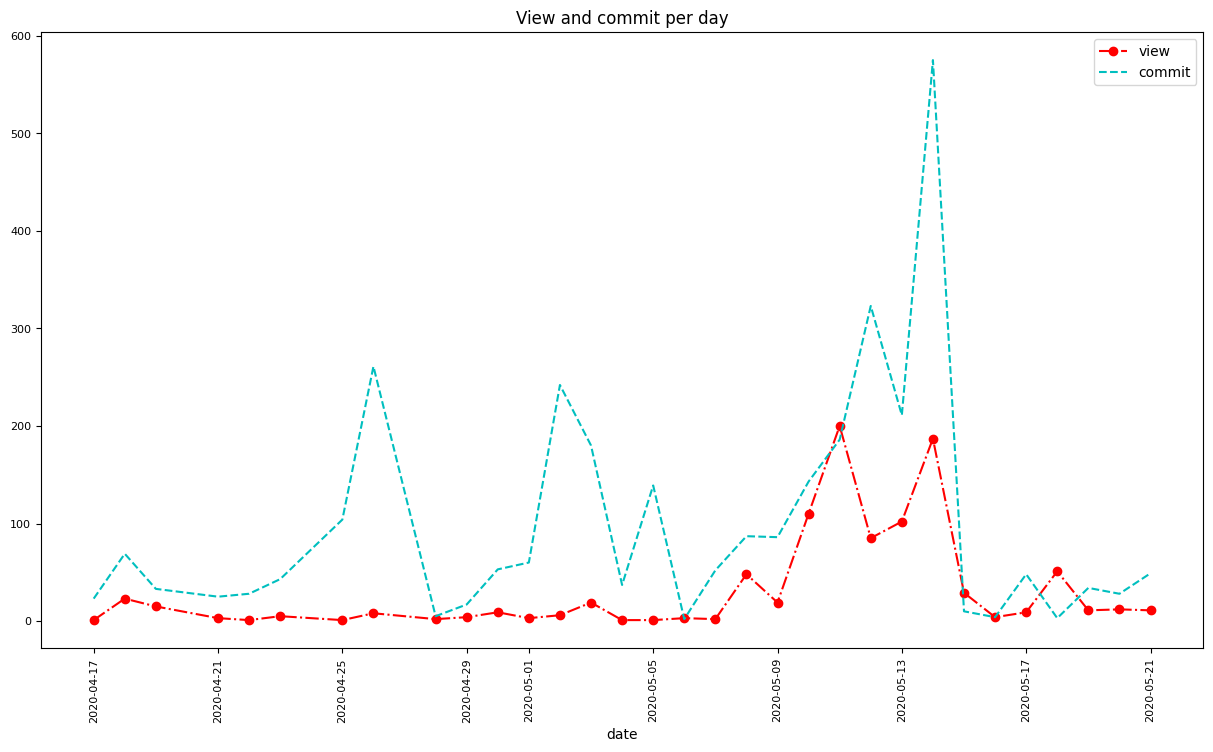

In [10]:
dataframe_merge.plot(x="date", y=["view", "commit"], style=["o-.", "--"], color=["r", "c"], title="View and commit per day", figsize=(15,8), fontsize=8, rot=90)

## Сколько раз количество просмотров было больше 150?

In [11]:
res = dataframe_merge[dataframe_merge["view"] > 150]["view"].count()

In [12]:
print(f"Ответ: {res}")

Ответ: 2


In [13]:
data.close()